In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense


In [3]:
import warnings

warnings.filterwarnings('ignore')

Create the Convolutional Neural Network

In [4]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(keras.layers.Dropout(rate=0.15)) # to curb overfitting
model.add(Conv2D(filters=64,kernel_size=3,activation='relu',))
model.add(MaxPooling2D(pool_size=2))
model.add(keras.layers.Dropout(rate=0.15))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(keras.layers.Dropout(rate=0.15))

model.add(Flatten())

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 64)        0

In [6]:
model.add(Dense(units=1024,activation='relu',kernel_initializer='uniform'))

model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))



In [7]:
model.add(Dense(units=3,activation='softmax',kernel_initializer='uniform'))

In [8]:
model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 64)        0

In [10]:
from keras.preprocessing.image import ImageDataGenerator

In [11]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True, validation_split=0.10)


In [12]:
type(train_datagen)

keras.preprocessing.image.ImageDataGenerator

In [13]:
train_set = train_datagen.flow_from_directory ('/content/drive/MyDrive/Abhishek/test/train',target_size=(64, 64),batch_size=32,class_mode='categorical',subset = 'training')

Found 702 images belonging to 3 classes.


In [14]:
validation_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/Abhishek/test/train',target_size=(64, 64),batch_size=32, class_mode='categorical', subset='validation')

Found 76 images belonging to 3 classes.


In [15]:
#import tensorflow as tf
#callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)


In [16]:
history = model.fit_generator(train_set,steps_per_epoch= len(train_set),epochs=50,validation_data=validation_generator,validation_steps=len(validation_generator),verbose=1)

Epoch 1/50
22/22 [==============================] - 8s 181ms/step - loss: 1.0638 - accuracy: 0.4630 - val_loss: 1.0390 - val_accuracy: 0.4211
Epoch 2/50
22/22 [==============================] - 3s 151ms/step - loss: 0.7859 - accuracy: 0.6382 - val_loss: 0.5992 - val_accuracy: 0.6842
Epoch 3/50
22/22 [==============================] - 3s 154ms/step - loss: 0.5507 - accuracy: 0.7536 - val_loss: 0.3957 - val_accuracy: 0.8684
Epoch 4/50
22/22 [==============================] - 3s 154ms/step - loss: 0.4516 - accuracy: 0.7806 - val_loss: 0.4707 - val_accuracy: 0.8026
Epoch 5/50
22/22 [==============================] - 3s 152ms/step - loss: 0.3808 - accuracy: 0.8219 - val_loss: 0.3578 - val_accuracy: 0.8026
Epoch 6/50
22/22 [==============================] - 3s 152ms/step - loss: 0.3338 - accuracy: 0.8789 - val_loss: 0.2967 - val_accuracy: 0.8947
Epoch 7/50
22/22 [==============================] - 3s 146ms/step - loss: 0.2550 - accuracy: 0.9031 - val_loss: 0.2847 - val_accuracy: 0.8947
Epoch 

Predicting a New Image

In [17]:
import numpy as np
from keras.preprocessing import image

In [18]:
new_image=image.load_img('/content/drive/MyDrive/Abhishek/test/IMG_0326.jpg',target_size=(64,64))

In [19]:
new_image=image.img_to_array(new_image)

In [20]:
new_image1=np.expand_dims(new_image,axis=0)

In [21]:
result=model.predict(new_image1)

In [22]:
result

array([[0., 1., 0.]], dtype=float32)

In [23]:
train_set.class_indices

{'Boots': 0, 'Sandals': 1, 'Slippers': 2}

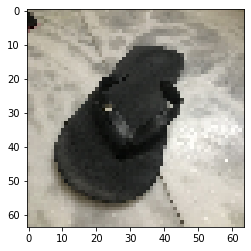

In [24]:
import matplotlib.pyplot as plt
plt.imshow(new_image.astype(int))

In [25]:

if result[0][0]==1:
    predict=print('This is a Boot')
elif result[0][1]==1:   
    predict=print('This is a Sandel') 
else:
    predict=print('This is a Slipper')

This is a Sandel
